In [1]:
import os
# Set the working directory to the directory of the script
os.chdir(r"G:/Mon Drive/Cat's_Software/TRAIL_v2024")

#  <img src="../data/logo_transparent.png" width="70"> 2. Analyse Trails & Model

In [17]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.patches
# from sklearn import linear_model
import numpy as np
import datetime
import seaborn as sns
# from geopy.distance import geodesic
import ipywidgets as widgets
from IPython.display import display

from dep.coureur import Coureur
from dep.trails import Trail

# Modules

# Loading data

In [3]:
# coureur = 'Jim WALMSLEY'
Pugin = Coureur(nom= 'PUGIN',
                   prenom= 'Jean-Francois',
                   poids=65,
                   )
# coureur = 'Christian GAVIGNET'
# coureur = 'Jonas RUSSI'

coureur_choisi = Pugin

PIK = f"./data/coureurs/{coureur_choisi.prenom_nom}.dat"
Trails_objects = []
with open(PIK, "rb") as f:
    while True:
        try:
            Trails_objects.append(pickle.load(f))
        except EOFError:
            break

In [4]:
Lst_trails = pd.read_csv(f'./data/coureurs/ListeDesTrails_{coureur_choisi.prenom_nom}.csv',sep=';')
Lst_trails = Lst_trails[~Lst_trails['Trail'].isna()]
Lst_trails

,Trail,Date,Suivi,Heure_depart,Lien_URL,Fichier_parcours_gpx,Vit_plat_km/h,Vit_den+_m/h,Csv_file,Date_dt,Modele_prediction,Fit_intercept,Ralent_sec/km
0,2022TDS,2022-08-23,livetrail,00:00:00,https://livetrail.net/histo/utmb_2022/parcours...,tracedetrail_183308.gpx,15.38,1218.0,2022-08-23_TDS®_147.6km.csv,2022-08-23,points_passages,0.0,11.43
1,2022MaXiRace,2022-05-28,livetrail,02:50:00,https://livetrail.net/histo/maxirace_2022/,tracedetrail_168303.gpx,13.91,2326.0,2022-05-28_MaXi Race_86.6km.csv,2022-05-28,points_passages,0.0,7.84
2,2024UTMB,2023-09-01,A prédire,17:59:00,https://livetrail.net/histo/utmb_2023,utmb-2023.gpx,NaN,NaN,2023-09-01_UTMB®_173.5km.csv,2023-09-01,points_passages,NaN,NaN
3,2024LAVAREDO,2024-06-28,A prédire,23:00:00,https://livetrail.net/histo/lavaredo_2024,lavaredo-ultra-trail-2021-120k.gpx,NaN,NaN,2023-06-23_LAVAREDO 120K_122.2km.csv,2024-06-28,points_passages,NaN,NaN
4,2023WILD,2023-09-15,livetrail,05:01:00,https://livetrail.net/histo/wildstrubel_2023,tracedetrail_224737.gpx,14.65,1763.0,2023-09-15_Wild 110k_113.7km.csv,2023-09-15,points_passages,0.0,12.89
5,ALL,NaN,All,NaN,NaN,NaN,15.45,1446.0,NaN,NaN,points_passages,0.0,12.08
6,PROFIL,NaN,PROFIL,NaN,NaN,NaN,13.01,1713.0,NaN,NaN,points_passages,0.0,5.12


In [5]:
for T in Trails_objects:
    print(T.nom_id)

2022TDS
2022MaXiRace
2024UTMB
2024LAVAREDO
2023WILD
ALL
PROFIL


In [7]:
PROFIL = Trail(nom_id='PROFIL', d='NA', s='PROFIL', hd='NA', csv='NA', mod='points_passages')

PROFIL.list_trails = list()

print('Selectionner les trails à considérer pour établir le profil:')
# Create a Dropdown with multiple selection enabled
multi_dropdown = widgets.Dropdown(
    options=[T.nom_id for T in Trails_objects],
    value=[T.nom_id for T in Trails_objects][-1],  # Default selected values
    description='Sélectionner les trails',
    disabled=False
)

# Display the widget
display(multi_dropdown)

# Function to print the selected options
def on_change(change):
    print('Selected values:', multi_dropdown.value)
    PROFIL.list_trails.append(multi_dropdown.value)

# Observe changes in the widget
multi_dropdown.observe(on_change, names='value')

Selectionner les trails à considérer pour établir le profil:


Dropdown(description='Sélectionner les trails', index=6, options=('2022TDS', '2022MaXiRace', '2024UTMB', '2024…

Selected values: 2022MaXiRace
Selected values: 2023WILD


In [8]:
PROFIL.df_ppassage = pd.DataFrame()
PROFIL.df_parcours = pd.DataFrame()

for T in Trails_objects:

    if T.nom_id in PROFIL.list_trails and (T.suivi == 'livetrail' or T.nom_id == 'livetrack'):
        PROFIL.df_ppassage = pd.concat([PROFIL.df_ppassage,T.df_ppassage])

    if T.nom_id in PROFIL.list_trails and (T.suivi == 'gpx'):
        PROFIL.df_parcours = pd.concat([PROFIL.df_parcours,T.df_parcours],ignore_index=True)


if Trails_objects[-1].nom_id == 'PROFIL':
    Trails_objects[-1] = PROFIL
else:
    Trails_objects.append(PROFIL)
Trails_objects[-1].modele_pred = Trails_objects[-2].modele_pred 
print(f'PROFIL ajouté à la liste des trails: {PROFIL.list_trails}')

PROFIL ajouté à la liste des trails: ['2022MaXiRace', '2023WILD']


In [9]:
for i,T in enumerate(Trails_objects):
    print(i,T.nom_id,T.date,T.suivi,T.heure_depart,T.csv_file)

0 2022TDS 2022-08-23 livetrail 00:00:00 2022-08-23_TDS®_147.6km.csv
1 2022MaXiRace 2022-05-28 livetrail 02:50:00 2022-05-28_MaXi Race_86.6km.csv
2 2024UTMB 2023-09-01 A prédire 17:59:00 2023-09-01_UTMB®_173.5km.csv
3 2024LAVAREDO 2024-06-28 A prédire 23:00:00 2023-06-23_LAVAREDO 120K_122.2km.csv
4 2023WILD 2023-09-15 livetrail 05:01:00 2023-09-15_Wild 110k_113.7km.csv
5 ALL NA All NA NA
6 PROFIL NA PROFIL NA NA


# Analyse sur df_ppassage

In [10]:
Trails_objects[0].df_ppassage

,id,Point_passage,Altitude_m,Cumul_Dist_km,Delta_Dist_km,Cumul_D+_m,Delta_D+_m,lon,lat,Heure_Passage,Temps_course,Classement,Vitesse_km/h,H_reel_h,Delta_reel_h,H_reel_h_init,Delta_reel_h_init,Trail
0,0,Courmayeur,1229,0.0,0.0,0,0,6.97176,45.79288,Tue. 00:00,00:00:00,-,0.00,0.000000,0.000000,0.000000,0.000000,2022TDS
1,45,Checrouit - Maison Veille,1947,6.8,6.8,789,789,6.93114,45.79073,Tue. 00:54,00:54:14,28,7.47,0.903889,0.903889,0.903889,0.903889,2022TDS
2,46,Arête du Mont-Favre,2431,11.3,4.5,1383,594,6.89001,45.77228,Tue. 01:32,01:32:04,24,7.28,1.534444,0.630556,1.534444,0.630556,2022TDS
3,47,Lac Combal,1975,15.2,3.9,1423,40,6.85595,45.77058,Tue. 01:53,01:52:52,22,11.25,1.881111,0.346667,1.881111,0.346667,2022TDS
4,48,Col Chavannes,2591,19.9,4.7,2067,644,6.83501,45.74951,Tue. 02:36,02:35:56,17,6.45,2.598889,0.717778,2.598889,0.717778,2022TDS
5,50,Col du petit Saint Bernard,2188,35.5,15.6,2665,598,6.88566,45.68320,Tue. 04:12,04:12:14,18,9.76,4.203889,1.605000,4.203889,1.605000,2022TDS
6,52,Séez,913,47.1,11.6,2705,40,6.80020,45.62282,Tue. 05:12,05:11:49,15,11.68,5.196944,0.993056,5.196944,0.993056,2022TDS
7,53,Bourg Saint-Maurice - Entrée,858,50.8,3.7,2765,60,6.76524,45.61761,Tue. 05:29,05:29:01,15,12.70,5.483611,0.286667,5.483611,0.286667,2022TDS
8,54,Bourg Saint-Maurice - Sortie,858,50.8,0.0,2765,0,6.76524,45.61761,Tue. 05:36,05:35:48,15,0.00,5.596667,0.113056,5.596667,0.113056,2022TDS
9,56,Fort de la Platte,1972,55.6,4.8,3882,1117,6.74301,45.63778,Tue. 06:46,06:46:23,14,4.08,6.773056,1.176389,6.773056,1.176389,2022TDS


### Calcul des vitesse moyennes de chaque trail - Methode sans bound

0 2022TDS


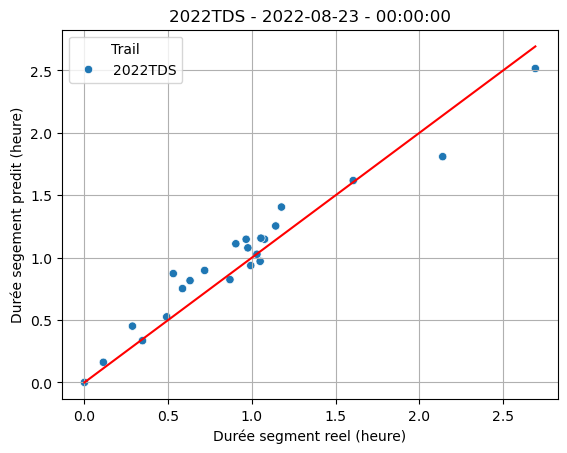

ridge_model.score(X_test, y_test)=0.5064892791256961
ridge_model.coef_=array([0.06501661, 0.00082076, 0.00317483])
ridge_model.intercept_=0.0
Vitesse sur le plat (en km/h)       : 15.4
Vitesse en dénivelé (en m/h)        : 1218
Ralentissement (en sec ajoutée /km) : 11.43
Fit intercept (en sec)             : 0.0
-------------new_analysis_completed-------------
1 2022MaXiRace


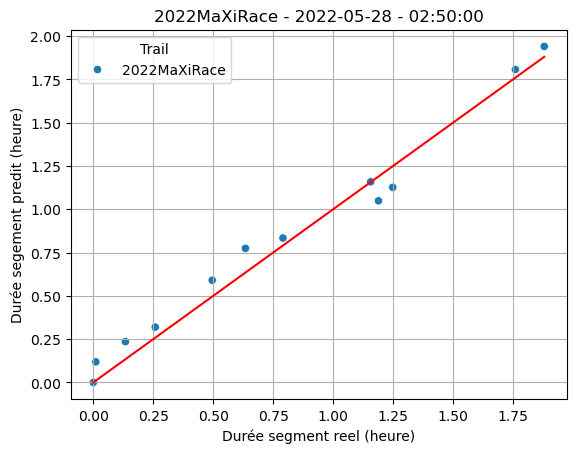

ridge_model.score(X_test, y_test)=0.8986991314534615
ridge_model.coef_=array([0.07188483, 0.00042982, 0.00217695])
ridge_model.intercept_=0.0
Vitesse sur le plat (en km/h)       : 13.9
Vitesse en dénivelé (en m/h)        : 2326
Ralentissement (en sec ajoutée /km) : 7.84
Fit intercept (en sec)             : 0.0
-------------new_analysis_completed-------------
4 2023WILD


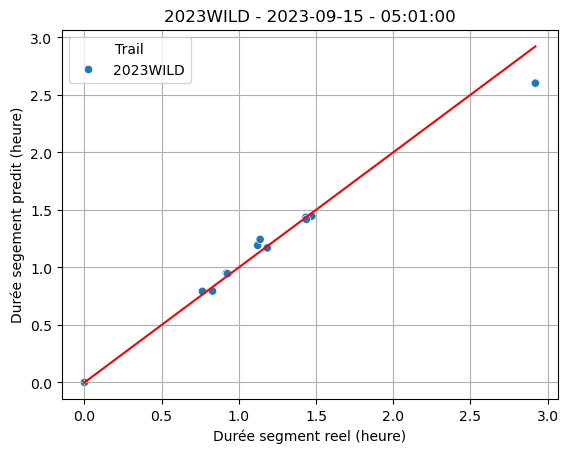

ridge_model.score(X_test, y_test)=0.9457872711683597
ridge_model.coef_=array([0.06824645, 0.00056705, 0.00358023])
ridge_model.intercept_=0.0
Vitesse sur le plat (en km/h)       : 14.6
Vitesse en dénivelé (en m/h)        : 1763
Ralentissement (en sec ajoutée /km) : 12.89
Fit intercept (en sec)             : 0.0
-------------new_analysis_completed-------------
5 ALL


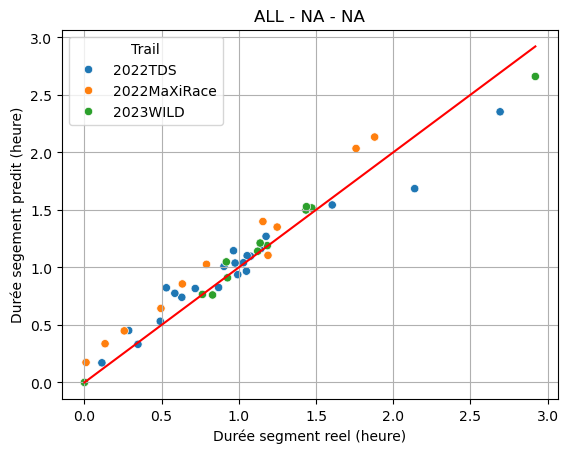

ridge_model.score(X_test, y_test)=0.8621395248016999
ridge_model.coef_=array([0.0647434 , 0.00069149, 0.00335674])
ridge_model.intercept_=0.0
Vitesse sur le plat (en km/h)       : 15.4
Vitesse en dénivelé (en m/h)        : 1446
Ralentissement (en sec ajoutée /km) : 12.08
Fit intercept (en sec)             : 0.0
6 PROFIL


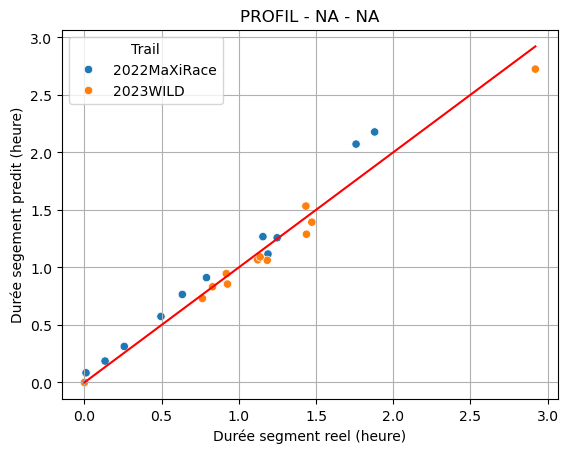

ridge_model.score(X_test, y_test)=0.9151988693735151
ridge_model.coef_=array([0.07684002, 0.00058358, 0.00142342])
ridge_model.intercept_=0.0
Vitesse sur le plat (en km/h)       : 13.0
Vitesse en dénivelé (en m/h)        : 1713
Ralentissement (en sec ajoutée /km) : 5.12
Fit intercept (en sec)             : 0.0
task_completed


In [14]:
Lst_trails['Date_dt']=pd.to_datetime(Lst_trails.loc[(Lst_trails['Suivi']!='All') & (Lst_trails['Suivi']!='PROFIL'), 'Date'])

for num_trail, T in enumerate(Trails_objects):
    if T.suivi == 'livetrail' or T.suivi == 'livetrack':
        if pd.to_datetime(T.date) <= datetime.datetime.now() :# and pd.isnull(Lst_trails.loc[i,'Vit_plat_km/h']):
            print(num_trail, T.nom_id)
            # Trails_objects[i].load_ppassage_csv() # Trail déjà chargé à l'étape précédente
            T.remove_missing() # Elimine les lignes manquantes et recalcule le temps
            # Trails_objects[i].analyse2()
            T.analyse3() 
            T.analyse3_gpx()
            print('-------------new_analysis_completed-------------')
    
    elif T.suivi == 'A prédire':
            T.analyse3_gpx()
            T.vit_plat = None
            T.vit_Dplus = None
            T.ralentissement = None
            T.fit_intercept = None

    elif T.suivi == 'All' or T.suivi == 'PROFIL':
        print(num_trail, T.nom_id)
        T.analyse3()
        Lst_trails.loc[num_trail,'Trail'] = T.nom_id
        Lst_trails.loc[num_trail,'Date'] = T.date
        Lst_trails.loc[num_trail,'Heure_depart'] = T.heure_depart
        Lst_trails.loc[num_trail,'Suivi'] = T.suivi


    else :
        T.vit_plat = None
        T.vit_Dplus = None
        T.ralentissement = None
        T.fit_intercept = None


    # Chargement dans le fichier de synthese
    Lst_trails.loc[num_trail,'Vit_plat_km/h'] = T.vit_plat
    Lst_trails.loc[num_trail,'Vit_den+_m/h'] = T.vit_Dplus
    Lst_trails.loc[num_trail,'Ralent_sec/km'] = T.ralentissement
    Lst_trails.loc[num_trail,'Fit_intercept'] = T.fit_intercept

Lst_trails.to_csv(f'./data/coureurs/ListeDesTrails_{coureur_choisi.prenom_nom}.csv',sep=';', index=False)
print('task_completed')

In [15]:
Lst_trails

,Trail,Date,Suivi,Heure_depart,Lien_URL,Fichier_parcours_gpx,Vit_plat_km/h,Vit_den+_m/h,Csv_file,Date_dt,Modele_prediction,Fit_intercept,Ralent_sec/km
0,2022TDS,2022-08-23,livetrail,00:00:00,https://livetrail.net/histo/utmb_2022/parcours...,tracedetrail_183308.gpx,15.38,1218.0,2022-08-23_TDS®_147.6km.csv,2022-08-23,points_passages,0.0,11.43
1,2022MaXiRace,2022-05-28,livetrail,02:50:00,https://livetrail.net/histo/maxirace_2022/,tracedetrail_168303.gpx,13.91,2326.0,2022-05-28_MaXi Race_86.6km.csv,2022-05-28,points_passages,0.0,7.84
2,2024UTMB,2023-09-01,A prédire,17:59:00,https://livetrail.net/histo/utmb_2023,utmb-2023.gpx,NaN,NaN,2023-09-01_UTMB®_173.5km.csv,2023-09-01,points_passages,NaN,NaN
3,2024LAVAREDO,2024-06-28,A prédire,23:00:00,https://livetrail.net/histo/lavaredo_2024,lavaredo-ultra-trail-2021-120k.gpx,NaN,NaN,2023-06-23_LAVAREDO 120K_122.2km.csv,2024-06-28,points_passages,NaN,NaN
4,2023WILD,2023-09-15,livetrail,05:01:00,https://livetrail.net/histo/wildstrubel_2023,tracedetrail_224737.gpx,14.65,1763.0,2023-09-15_Wild 110k_113.7km.csv,2023-09-15,points_passages,0.0,12.89
5,ALL,NA,All,NA,NaN,NaN,15.45,1446.0,NaN,NaT,points_passages,0.0,12.08
6,PROFIL,NA,PROFIL,NA,NaN,NaN,13.01,1713.0,NaN,NaT,points_passages,0.0,5.12


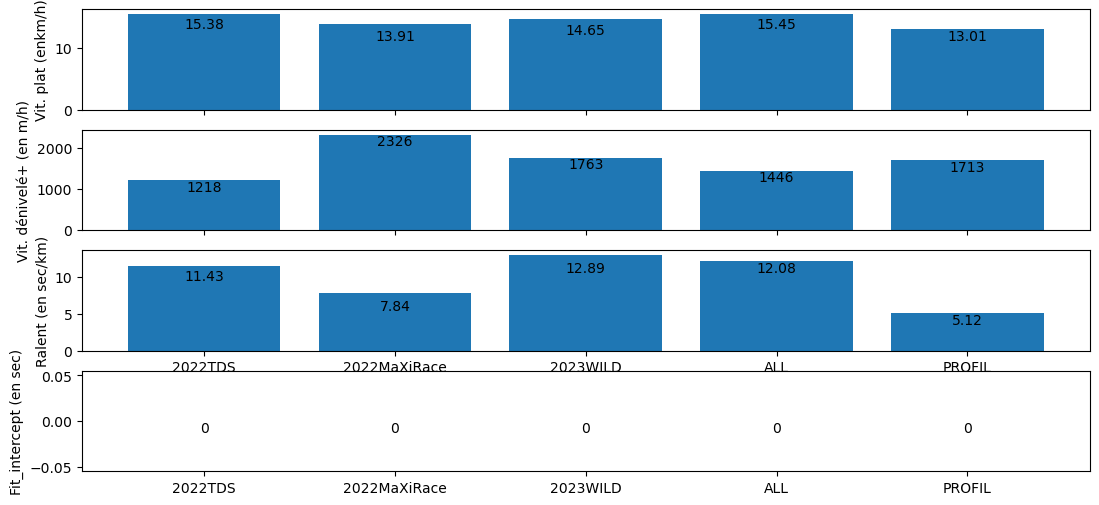

In [18]:
Lst_trails_analysés = Lst_trails[Lst_trails['Suivi']!= 'A prédire']

Lst_trails_analysés.reset_index(inplace=True)

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(13,6))

ax[0].bar(Lst_trails_analysés['Trail'],Lst_trails_analysés['Vit_plat_km/h']);
# hide xlabel
plt.setp(ax[0].get_xticklabels(), visible=False)
ax[0].set_ylabel('Vit. plat (enkm/h)');

ax[1].bar(Lst_trails_analysés['Trail'],Lst_trails_analysés['Vit_den+_m/h']);
plt.setp(ax[1].get_xticklabels(), visible=False)
ax[1].set_ylabel('Vit. dénivelé+ (en m/h)');

ax[2].bar(Lst_trails_analysés['Trail'],Lst_trails_analysés['Ralent_sec/km']);
plt.setp(ax[1].get_xticklabels(), visible=False)
ax[2].set_ylabel('Ralent (en sec/km)');

ax[3].bar(Lst_trails_analysés['Trail'],Lst_trails_analysés['Fit_intercept']);
ax[3].set_ylabel('Fit_intercept (en sec)');

for i,t in Lst_trails_analysés.iterrows():
    ax[0].text(i, int(t['Vit_plat_km/h']),t['Vit_plat_km/h'],ha='center', va='top')
    ax[1].text(i, int(t['Vit_den+_m/h']),int(t['Vit_den+_m/h']),ha='center', va='top')
    ax[2].text(i, int(t['Ralent_sec/km']),t['Ralent_sec/km'],ha='center', va='top')
    ax[3].text(i, int(t['Fit_intercept']),int(t['Fit_intercept']),ha='center', va='top')

## Live Trail prediction

In [21]:
# durée_arret = 0
# à_partir_de = 13

# for i,T in enumerate(Trails_objects):
#     if pd.to_datetime(T.date)<=datetime.datetime.now() and i<(len(Trails_objects)-1):
#         # print(T.nom_id,T.date,T.suivi,T.heure_depart,T.csv_file)
#         fig2=plt.figure()
#         #
#         v11,v12,r1 = Lst_trails.loc[i,'Vit_plat_km/h'],Lst_trails.loc[i,'Vit_den+_m/h'],Lst_trails.loc[i,'Ralent_h/km']
#         df1 = T.pred_temps(v11,v12,r1,durée_arret,à_partir_de)
#         plt.scatter(df1['H_reel_h'],df1['Pred_Cum_T_Rom'],color="blue")
#         #
#         v21,v22,r2 = 16.7, 1241, 0.0029
#         df2 = T.pred_temps(v21,v22,r2,durée_arret,à_partir_de)
#         plt.scatter(df2['H_reel_h'],df2['Pred_Cum_T_Rom'],color="green")
#         #
#         v31,v32,r3 = 12.6, 1225, 0
#         df3 = T.pred_temps(v31,v32,r3,durée_arret,à_partir_de)
#         plt.scatter(df3['H_reel_h'],df3['Pred_Cum_T_Rom'],color="orange")
#         #
#         #
#         plt.plot([0,30],[0,30],c='red')
#         plt.title(T.nom_id)
#         plt.legend([f'{v11} km/h | {v12} m/h | {r1} h/km',f'{v21} km/h | {v22} m/h | {r2} h/km',f'{v31} km/h | {v32} m/h | {r3} h/km','best fit'])
#         plt.xlabel('Heure réelle (heure)')
#         plt.ylabel('Heure predite (heure)')
#         plt.grid()
#     else:
#         print(T.nom_id,T.date,T.suivi,T.heure_depart,T.csv_file)
#         fig2=plt.figure()
#         #
#         # v11,v12,r1 = 7,1200,0.02
#         # df1 = T.pred_temps(v11,v12,r1,durée_arret,à_partir_de)
#         # plt.scatter(df1['H_reel_h'],df1['Pred_Cum_T_Rom'],color="blue")
#         #
#         # v21,v22,r2 = Lst_trails.loc[i,'Vit_plat_km/h'],Lst_trails.loc[i,'Vit_den+_m/h'],0
#         # df2 = T.pred_temps(v21,v22,r2,durée_arret,à_partir_de)
#         # plt.scatter(df2['H_reel_h'],df2['Pred_Cum_T_Rom'],color="green")
#         #
#         # v31,v32,r3 = 8.8,949, 0.00559
#         # df3 = T.pred_temps(v31,v32,r3,durée_arret,à_partir_de)
#         # plt.scatter(df3['H_reel_h'],df3['Pred_Cum_T_Rom'],color="orange")
#         #
#         #
#         # plt.plot([0,24],[0,24],c='red')
#         # plt.title(T.nom_id)
#         # plt.legend([f'{v11} km/h | {v12} m/h | {r1} h/h',f'{v21} km/h | {v22} m/h | {r2} h/h',f'{v31} km/h | {v32} m/h | {r3} h/h','best fit'])
#         # plt.xlabel('Heure réelle (heure)')
#         # plt.ylabel('Heure predite (heure)')
#         # plt.grid()

In [22]:
Trails_objects[2].df_parcours

,Altitude_m,Heure_Passage,hr,cad,lat,lon,Delta_Dist_m,Delta_reel_s,Dénivelé_m,Delta_D+_m,Delta_D-_m,Cumul_Dist_m,H_reel_s,Temps_course,Cumul_D+_m,Cumul_D-_m,Delta_Dist_km,Cumul_Dist_km
0,1042.0,2024-05-01 19:37:05+00:00,NA,NA,45.92371,6.86875,0.000000,0,0,0,0,0.000000,0,0:00:00,0,0,0.000000,0.000000
1,1037.0,2024-05-01 19:37:08+00:00,NA,NA,45.92359,6.86915,34.141366,3,-5,0,-5,34.141366,3,0:00:03,0,-5,0.034141,0.034141
2,1037.0,2024-05-01 19:37:11+00:00,NA,NA,45.92340,6.86968,46.218979,3,0,0,0,80.360345,6,0:00:06,0,-5,0.046219,0.080360
3,1038.0,2024-05-01 19:37:14+00:00,NA,NA,45.92316,6.86945,32.107848,3,1,1,0,112.468193,9,0:00:09,1,-5,0.032108,0.112468
4,1040.0,2024-05-01 19:37:17+00:00,NA,NA,45.92278,6.86908,51.104943,3,2,2,0,163.573136,12,0:00:12,3,-5,0.051105,0.163573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,1034.0,2024-05-02 00:14:11+00:00,NA,NA,45.92314,6.86987,22.132089,3,-2,0,-2,168769.183826,16626,4:37:06,11594,-11602,0.022132,168.769184
5543,1033.0,2024-05-02 00:14:14+00:00,NA,NA,45.92332,6.86972,23.166028,3,-1,0,-1,168792.349854,16629,4:37:09,11594,-11603,0.023166,168.792350
5544,1033.0,2024-05-02 00:14:17+00:00,NA,NA,45.92350,6.86960,22.066384,3,0,0,0,168814.416239,16632,4:37:12,11594,-11603,0.022066,168.814416
5545,1037.0,2024-05-02 00:14:20+00:00,NA,NA,45.92359,6.86933,23.552405,3,4,4,0,168837.968643,16635,4:37:15,11598,-11603,0.023552,168.837969


# Prediction à partir des gpx - Analyse sur df_parcours

In [24]:
for num_trail, T in enumerate(Trails_objects):


    if T.modele_pred == 'gpx':
        print(T.nom_id)

        T.analyse3_gpx()
        
        T.model_gpx()
        
        # Plot with seaborn 
        fig, ax = plt.subplots(2,1, figsize=(13,6))
        sns.lineplot(data=T.df_parcours, x='Cumul_Dist_m', y='Pred_Cum_T_Rom_s', ax=ax[0], label="Predicted time", color='blue')
        sns.lineplot(data=T.df_parcours, x='Cumul_Dist_m', y='H_reel_s', ax=ax[0], label="Real time", color='red')
        # ax[0].set_xlabel('Cumul_Dist_m')
        ax[0].set_ylabel('Cumulated time (s)')
        ax[0].legend()
        ax[0].grid()
        sns.lineplot(data=T.df_parcours, x='Cumul_Dist_m', y='Altitude_m', ax=ax[1])
        ax[1].set_xlabel('Cumul_Dist_m')
        ax[1].set_ylabel('Altitude (m)')
        ax[1].grid()
        # Put title 
        plt.suptitle(f'{T.nom_id} | vit_plat:{T.vit_plat}km/h | vit_Dplus:{T.vit_Dplus}m/h | ralent.:{T.ralentissement}sec/km | fit_inter.:{T.fit_intercept}sec')
        plt.show()

        display(T.df_parcours)

    else:
        print('Prédiction pas à partir de gpx')

Prédiction pas à partir de gpx
Prédiction pas à partir de gpx
Prédiction pas à partir de gpx
Prédiction pas à partir de gpx
Prédiction pas à partir de gpx
Prédiction pas à partir de gpx
Prédiction pas à partir de gpx


# Save Trails in pickle file

In [25]:
PIK = f"./data/coureurs/{coureur_choisi.prenom_nom}.dat"
with open(PIK, "wb") as f:
    for T in Trails_objects:
        pickle.dump(T, f)
    # pickle.dump(ALL, f)
print('Task completed')

Task completed


In [26]:
for i,T in enumerate(Trails_objects):
    print(i)
    Lst_trails.loc[i, 'Vit_plat_km/h'] = T.vit_plat
    Lst_trails.loc[i, 'Vit_den+_m/h'] = T.vit_Dplus
    Lst_trails.loc[i, 'Ralent_sec/km'] = T.ralentissement
    Lst_trails.loc[i, 'Fit_intercept'] = T.fit_intercept
    if T.nom_id == 'ALL' or T.nom_id == 'PROFIL':
        Lst_trails.loc[i, 'Trail'] = T.nom_id
        Lst_trails.loc[i, 'Suivi'] = T.suivi
        Lst_trails.loc[i, 'Modele_prediction'] = T.modele_pred


0
1
2
3
4
5
6


NameError: name 'coureur' is not defined

In [18]:
Lst_trails

,Trail,Date,Suivi,Heure_depart,Lien_URL,Fichier_parcours_gpx,Vit_plat_km/h,Vit_den+_m/h,Csv_file,Date_dt,Modele_prediction,Fit_intercept,Ralent_sec/km
0,2022TDS,2022-08-23,livetrail,00:00:00,https://livetrail.net/histo/utmb_2022/parcours...,tracedetrail_183308.gpx,15.38,1218.0,2022-08-23_TDS®_147.6km.csv,2022-08-23,points_passages,0.0,11.43
1,2022MaXiRace,2022-05-28,livetrail,02:50:00,https://livetrail.net/histo/maxirace_2022/,tracedetrail_168303.gpx,13.91,2326.0,2022-05-28_MaXi Race_86.6km.csv,2022-05-28,points_passages,0.0,7.84
2,2024UTMB,2023-09-01,A prédire,17:59:00,https://livetrail.net/histo/utmb_2023,utmb-2023.gpx,NaN,NaN,2023-09-01_UTMB®_173.5km.csv,2023-09-01,points_passages,NaN,NaN
3,2024LAVAREDO,2024-06-28,A prédire,23:00:00,https://livetrail.net/histo/lavaredo_2024,lavaredo-ultra-trail-2021-120k.gpx,NaN,NaN,2023-06-23_LAVAREDO 120K_122.2km.csv,2024-06-28,points_passages,NaN,NaN
4,2023WILD,2023-09-15,livetrail,05:01:00,https://livetrail.net/histo/wildstrubel_2023,tracedetrail_224737.gpx,14.65,1763.0,2023-09-15_Wild 110k_113.7km.csv,2023-09-15,points_passages,0.0,12.89
5,ALL,NA,All,NA,NaN,NaN,15.45,1446.0,NaN,NaT,points_passages,0.0,12.08
6,PROFIL,NA,PROFIL,NA,NaN,NaN,13.01,1713.0,NaN,NaT,points_passages,0.0,5.12


# Plot Isolines

In [ ]:
Lst_trails['Vit_plat_km/h']

In [ ]:
# v11,v12 = 7.0,1109
v11 = np.linspace(4.5, 16, 100,endpoint=False)#[4.5+i/10 for i in range(1,75,1)]
v12=np.linspace(500, 3000, 100,endpoint=False)#[700+i*20 for i in range(1,75,1)]
X, Y = np.meshgrid(v11, v12)
dist = 114
dplus = 7200
t = dist/X+dplus/Y

In [ ]:
T_real = [dist/v1+dplus/v2 for v1,v2 in zip(Lst_trails['Vit_plat_km/h'].dropna(),Lst_trails['Vit_den+_m/h'].dropna())  ]

In [ ]:
label = [f'{n} \n {round(t_real,1)}h' for n,t_real in zip(Lst_trails['Trail'],T_real)]

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
# levels =[1+i/4 for i in range(0,9)]
Temps = ax.contour(X, Y, t)
ax.clabel(Temps, inline=True, fontsize=10)
ax.grid()
ax.set_title(f'Iso temps pour faire {dist}km et {dplus}mD+')
ax.set_xlabel('Vitesse plat km/h')
ax.set_ylabel('Vitesse D+ m/h')
ax.scatter(Lst_trails['Vit_plat_km/h'],Lst_trails['Vit_den+_m/h'])

for x,y,s in zip(Lst_trails['Vit_plat_km/h'],Lst_trails['Vit_den+_m/h'],label):
    ax.text(x,y,s)
ax.scatter([7],[1109],c='red')
ax.text(7,1109,f'All \n {round(dist/7+dplus/1109,1)}h')
# T_real.sort()
# Temps2 = ax.contour(X, Y, t,levels= T_real,linestyles='dashed')
# ax.clabel(Temps2, inline=True, levels = T_real, fontsize=10 )

In [ ]:
# Constant vitesse D+
cstY = 1300
print(f'{cstY=}',f'{dist=}',f'{dplus=}')
t_real= np.array(T_real)
# t = dist/X+dplus/Y
cstX= dist/(t_real- dplus/cstY)
cstX
csty = [cstY for x in cstX]

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
# levels =[1+i/4 for i in range(0,9)]
Temps = ax.contour(X, Y, t)
ax.clabel(Temps, inline=True, fontsize=10)
ax.grid()
ax.set_title(f'Iso temps pour faire {dist}km et {dplus}mD+')
ax.set_xlabel('Vitesse plat km/h')
ax.set_ylabel('Vitesse D+ m/h')
ax.scatter(Lst_trails['Vit_plat_km/h'],Lst_trails['Vit_den+_m/h'])

for x,y,s in zip(Lst_trails['Vit_plat_km/h'],Lst_trails['Vit_den+_m/h'],label):
    ax.text(x,y,s)
ax.scatter([7],[1109],c='red')
ax.text(7,1109,f'All \n {round(dist/7+dplus/1109,1)}h')
Temps2 = ax.contour(X, Y, t,levels= sorted(T_real),linestyles='dashed')
ax.clabel(Temps2, inline=True, levels = sorted(T_real), fontsize=10 )
ax.scatter(cstX,csty)
fig.savefig('Iso-Temps UTB.jpg')

In [ ]:
cstX

In [ ]:
T_real

### Segments pour lesquels on a un grand écart entre la prédiction et la réalité